In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sqlite3 import connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [ ]:
dataset3 = pd.read_sql('''
select date(timestamp) as date,timestamp
from checker
where uid like '%user%' and status = 'ready'
''', con,parse_dates=['timestamp'])
dataset3

,date,timestamp
0,2020-04-17,2020-04-17 05:19:02.744528
1,2020-04-17,2020-04-17 05:22:45.549397
2,2020-04-17,2020-04-17 05:34:24.422370
3,2020-04-17,2020-04-17 05:43:27.773992
4,2020-04-17,2020-04-17 05:46:32.275104
...,...,...
1681,2020-05-21,2020-05-21 20:01:48.959966
1682,2020-05-21,2020-05-21 20:18:54.487900
1683,2020-05-21,2020-05-21 20:19:06.872761
1684,2020-05-21,2020-05-21 20:22:41.877806


In [ ]:
dataset3['hours'] =dataset3.timestamp.dt.hour
dataset3['daytime'] = pd.cut(dataset3.hours,                         #создали новый столбец daytime
                          bins=[0,4, 10,  17,24],
                          labels=['night', 'morning', 'afternoon', 'evening'],
                          right=False)
dataset3.drop(columns='hours', axis=1, inplace=True)
dataset3=dataset3.groupby(['date','daytime']).count()
dataset3.rename(columns={'timestamp': 'kol'}, inplace=True)
dataset3

kol
date       daytime       
2020-04-17 night        0
           morning      7
           afternoon    6
           evening      0
2020-04-18 night        0
...                   ...
2020-05-20 evening      6
2020-05-21 night        0
           morning      1
           afternoon   15
           evening     11

[140 rows x 1 columns]

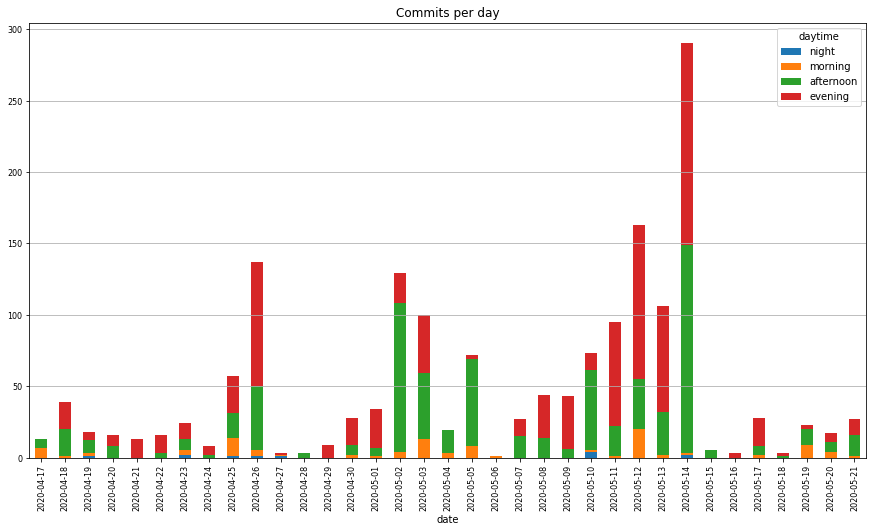

In [ ]:
dataset3.groupby(['date','daytime']).sum().unstack().plot(kind='bar',y='kol', fontsize=8, figsize=(15, 8), title = 'Commits per day' ,stacked=True).yaxis.grid(True)
pass

In [ ]:
#@markdown **Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?**

In [ ]:
#@markdown **Днем и вечером**

In [ ]:
con.close()